In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Magic: The Gathering é mais do que um jogo de cartas, é um portal para um multiverso de magia, estratégia e criatividade. Este projeto de visualização de dados o convida a mergulhar no emocionante universo de MTG de uma maneira totalmente nova.

Meu projeto tem como objetivo explorar e revelar alguns dos segredos que residem nos dados do Magic. Vamos analisar a distribuição de tipos de cartas, entender as tendências nas cores das cartas preferidas pelos jogadores e mergulhar no ranking EDH (Commander) para descobrir quais cartas são as mais populares na comunidade.
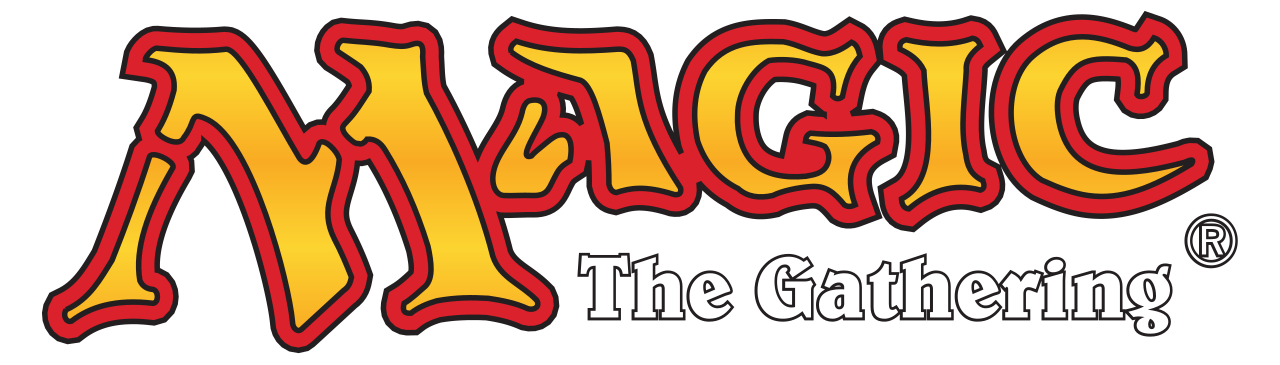

Importando e realizando analise exploratória


In [3]:
mtg = pd.read_json('C:/Users/arthu/Documents/Projetos/DataVisualizationMTG/AllCards.json')

In [4]:
mtg.head()

,"""Ach! Hans, Run!""","""Rumors of My Death . . .""",1996 World Champion,A Display of My Dark Power,A Good Thing,A Reckoning Approaches,AWOL,Abandon Hope,Abandon Reason,Abandoned Outpost,...,Zur's Weirding,Zuran Enchanter,Zuran Orb,Zuran Spellcaster,Zurgo Bellstriker,Zurgo Helmsmasher,"Zyym, Mesmeric Lord",Zzzyxas's Abyss,_____,capital offense
colorIdentity,"[G, R]",[B],"[B, G, R, U, W]",[],"[B, W]",[],[W],[B],[R],[W],...,[U],"[B, U]",[],[U],[R],"[B, R, W]","[B, U]",[B],[U],[B]
colors,"[G, R]",[B],"[B, G, R, U, W]",[],"[B, W]",[],[W],[B],[R],[],...,[U],[U],[],[U],[R],"[B, R, W]","[B, U]",[B],[U],[B]
convertedManaCost,6.0,3.0,5.0,0.0,6.0,0.0,3.0,2.0,3.0,0.0,...,4.0,2.0,0.0,3.0,1.0,5.0,4.0,3.0,2.0,4.0
foreignData,[],[],[],[],[],[],[],"[{'language': 'German', 'name': 'Verlust der H...","[{'language': 'German', 'name': 'Abkehr von de...","[{'language': 'German', 'name': 'Aufgegebener ...",...,"[{'language': 'German', 'name': 'Zurs bizarre ...","[{'language': 'German', 'name': 'Zuranischer V...",[],"[{'language': 'German', 'name': 'Zuranischer Z...","[{'language': 'German', 'name': 'Zurgo Glocken...","[{'language': 'Japanese', 'name': '兜砕きのズルゴ', '...",[],[],[],[]
layout,normal,normal,normal,scheme,normal,scheme,normal,normal,normal,normal,...,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal


In [5]:
#Aplicando o transpose para inverter a tabela
mtg = pd.DataFrame.transpose(mtg)
mtg.head()

,colorIdentity,colors,convertedManaCost,foreignData,layout,legalities,manaCost,name,printings,purchaseUrls,...,faceConvertedManaCost,names,side,isReserved,leadershipSkills,loyalty,hand,life,colorIndicator,hasNoDeckLimit
"""Ach! Hans, Run!""","[G, R]","[G, R]",6.0,[],normal,{},{2}{R}{R}{G}{G},"""Ach! Hans, Run!""",[UNH],{'cardmarket': 'https://mtgjson.com/links/6227...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Rumors of My Death . . .""",[B],[B],3.0,[],normal,{},{2}{B},"""Rumors of My Death . . .""",[UST],{'cardmarket': 'https://mtgjson.com/links/371e...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996 World Champion,"[B, G, R, U, W]","[B, G, R, U, W]",5.0,[],normal,{},{W}{U}{B}{R}{G},1996 World Champion,[PCEL],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Display of My Dark Power,[],[],0.0,[],scheme,{},NaN,A Display of My Dark Power,[OARC],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Good Thing,"[B, W]","[B, W]",6.0,[],normal,{},{4}{W}{B},A Good Thing,[MYSTPT],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Para o tipo de vizualização que irei fazer não vou precisar de todas as colunas da tabela, 
#por isso vamos excluir as que não serão usadaas para melhor legibilidade dos dados.

columns_used = ["colorIdentity","convertedManaCost","manaCost","name","types","edhrecRank"]
df = mtg[columns_used]
df.head()

,colorIdentity,convertedManaCost,manaCost,name,types,edhrecRank
"""Ach! Hans, Run!""","[G, R]",6.0,{2}{R}{R}{G}{G},"""Ach! Hans, Run!""",[Enchantment],NaN
"""Rumors of My Death . . .""",[B],3.0,{2}{B},"""Rumors of My Death . . .""",[Enchantment],NaN
1996 World Champion,"[B, G, R, U, W]",5.0,{W}{U}{B}{R}{G},1996 World Champion,[Summon],NaN
A Display of My Dark Power,[],0.0,NaN,A Display of My Dark Power,[Scheme],NaN
A Good Thing,"[B, W]",6.0,{4}{W}{B},A Good Thing,[Enchantment],NaN


In [40]:
#Vamos dar uma olhada na quantidade de cartas de por cor presentes no dataset.

colorIdentity = {'B': 'Black', 'G': 'Green', 'R': 'Red', 'U': 'Blue', 'W': 'White'}
colorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in df['colorIdentity']:
    if len(raw) == 0:
        colorCount['Colorless']+=1
    elif len(raw) > 1:
        colorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                colorCount[colorIdentity[color]]+=1
colorCount

{'Black': 3084,
 'Green': 3026,
 'Red': 3065,
 'Blue': 3039,
 'White': 3058,
 'Colorless': 2284,
 'Multi': 2922}

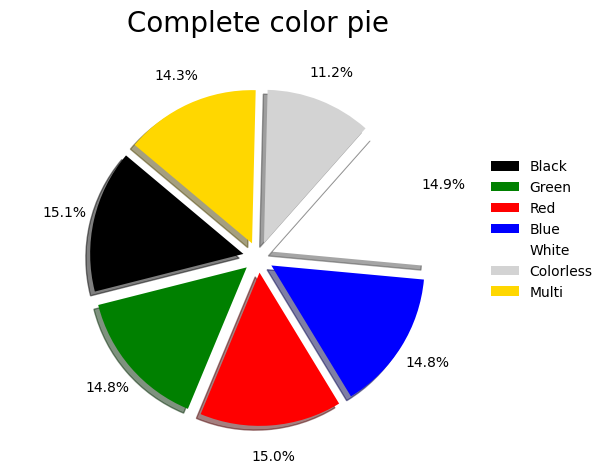

In [8]:
#Vamor dispor os dados obtidos na linha passada em um gráfico, para melhor visualização.

labels = colorCount.keys()
sizes = colorCount.values()
colors = ['Black', 'green', 'red', 'blue','white','lightgray','gold']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)

plt.title("Complete color pie",pad =30,fontsize=20)
plt.pie(sizes, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140,explode=explode,pctdistance=1.2)
plt.legend(labels=labels,frameon=False,bbox_to_anchor=(0.7, 0.3, 0.5, 0.5))
plt.axis('equal')
plt.show()

Vamos adicionar uma coluna no dataset com a quantidade de cores presente na carta, Alem de uma coluna para cada cor com true/false, idenficando se a carta possui ou não a cor.

In [41]:

df["colorNumber"] = mtg.colorIdentity.apply(len)
for color in colorIdentity:
    df[color] = False
for color in colorIdentity:
    df[color] = mtg.colorIdentity.apply(lambda x: color in x)
    

df.head()
#Agora podemos chegar em insights diferentes com os dados e criar graficos de forma mais fácil.

C:\Users\arthu\AppData\Local\Temp\ipykernel_1976\477327643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["colorNumber"] = mtg.colorIdentity.apply(len)
C:\Users\arthu\AppData\Local\Temp\ipykernel_1976\477327643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[color] = False
C:\Users\arthu\AppData\Local\Temp\ipykernel_1976\477327643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,colorIdentity,convertedManaCost,manaCost,name,types,edhrecRank,colorNumber,B,G,R,U,W
"""Ach! Hans, Run!""","[G, R]",6.0,{2}{R}{R}{G}{G},"""Ach! Hans, Run!""",[Enchantment],NaN,2,False,True,True,False,False
"""Rumors of My Death . . .""",[B],3.0,{2}{B},"""Rumors of My Death . . .""",[Enchantment],NaN,1,True,False,False,False,False
1996 World Champion,"[B, G, R, U, W]",5.0,{W}{U}{B}{R}{G},1996 World Champion,[Summon],NaN,5,True,True,True,True,True
A Display of My Dark Power,[],0.0,NaN,A Display of My Dark Power,[Scheme],NaN,0,False,False,False,False,False
A Good Thing,"[B, W]",6.0,{4}{W}{B},A Good Thing,[Enchantment],NaN,2,True,False,False,False,True


Text(0.5, 1.0, 'Numero de cores em cada carta')

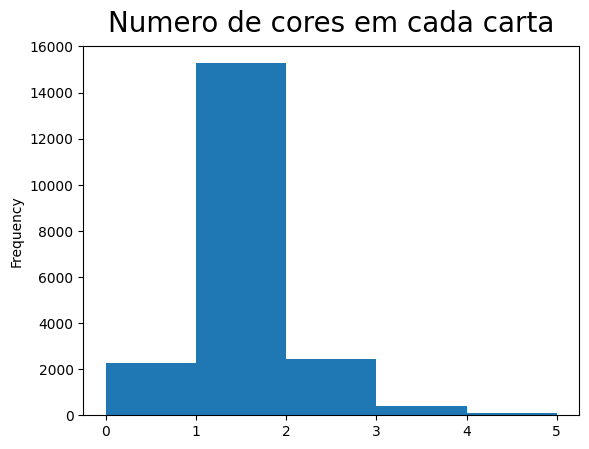

In [42]:
#Vamos vizualizar a distribuição de número de cores por carta
df['colorNumber'].plot.hist(bins=5)
plt.title("Numero de cores em cada carta",pad=10,fontsize=20)
#Como era de se esperar a quantidade de cartas monocoloridas é bem maior doque as outras

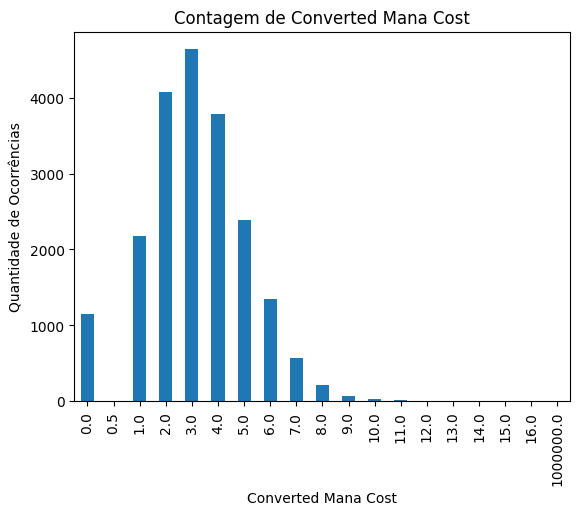

In [43]:
#Vamos criar um gráfico para visualizar a contagem de cartas de cada custo de mana convertido.
counted_values = df['convertedManaCost'].value_counts().sort_index()

counted_values.plot(kind='bar')

plt.xlabel('Converted Mana Cost')
plt.ylabel('Quantidade de Ocorrências')
plt.title('Contagem de Converted Mana Cost')

plt.show()

No gráfico anterior há dois valores um pouco diferente dos demais,  0.5 e 1000000.0, oque pode ser estranho a primeira vista, mas trata-se das cartas little girl ,e gleemax, ambas de coleções ''for fun'' focadas em criar cartas engraçadas e divertidas e não na jogabilidade em si.

![gleemax](unh-121-gleemax.jpg)
![littlegirl](unh-16-little-girl.jpg)

Vamos trabalhar agora com o rank das cartas de acordo com o EDHrecRank, 
esse ranking diz respeito as cartas mais usadas em decks de um determinado formato de jogo.

In [44]:
#Vamos começar limpando nosso dataset, deixando apenas as cartas que possuem um edhrecRank definido e ordenando do menor para o maior rank.
dfEdh = df.dropna(subset=['edhrecRank'])
df_sorted = dfEdh.sort_values(by="edhrecRank", ascending=True)
df_sorted

,colorIdentity,convertedManaCost,manaCost,name,types,edhrecRank,colorNumber,B,G,R,U,W
Sol Ring,[],1.0,{1},Sol Ring,[Artifact],1,0,False,False,False,False,False
Command Tower,[],0.0,NaN,Command Tower,[Land],2,0,False,False,False,False,False
Evolving Wilds,[],0.0,NaN,Evolving Wilds,[Land],8,0,False,False,False,False,False
Reliquary Tower,[],0.0,NaN,Reliquary Tower,[Land],9,0,False,False,False,False,False
Lightning Greaves,[],2.0,{2},Lightning Greaves,[Artifact],10,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Wormwood Dryad,"[B, G]",3.0,{2}{G},Wormwood Dryad,[Creature],19277,2,True,True,False,False,False
Wu Admiral,[U],5.0,{4}{U},Wu Admiral,[Creature],19278,1,False,False,False,True,False
"Xun Yu, Wei Advisor",[B],3.0,{1}{B}{B},"Xun Yu, Wei Advisor",[Creature],19279,1,True,False,False,False,False
Zealots en-Dal,[W],4.0,{3}{W},Zealots en-Dal,[Creature],19280,1,False,False,False,False,True


In [29]:
#Preto é minha cor favorita, por isso vamor dar uma olhada nas cartas pretas mais usadas.
filtered_df = df_sorted[df_sorted['B'] == True]
sorted_filtered_df = filtered_df.sort_values(by="edhrecRank", ascending=True)
sorted_filtered_df

,colorIdentity,convertedManaCost,manaCost,name,types,edhrecRank,power,toughness,colorNumber,B,G,R,U,W
Bojuka Bog,[B],0.0,NaN,Bojuka Bog,[Land],24,NaN,NaN,1,True,False,False,False,False
Demonic Tutor,[B],2.0,{1}{B},Demonic Tutor,[Sorcery],33,NaN,NaN,1,True,False,False,False,False
Watery Grave,"[B, U]",0.0,NaN,Watery Grave,[Land],38,NaN,NaN,2,True,False,False,True,False
Overgrown Tomb,"[B, G]",0.0,NaN,Overgrown Tomb,[Land],45,NaN,NaN,2,True,True,False,False,False
Dimir Signet,"[B, U]",2.0,{2},Dimir Signet,[Artifact],51,NaN,NaN,2,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake of Vultures,[B],4.0,{3}{B},Wake of Vultures,[Creature],19264,3,1,1,True,False,False,False,False
Wei Ambush Force,[B],2.0,{1}{B},Wei Ambush Force,[Creature],19268,1,1,1,True,False,False,False,False
Whipstitched Zombie,[B],2.0,{1}{B},Whipstitched Zombie,[Creature],19270,2,2,1,True,False,False,False,False
Wormwood Dryad,"[B, G]",3.0,{2}{G},Wormwood Dryad,[Creature],19277,3,1,2,True,True,False,False,False


In [45]:
#Cartas de 5 cores são dificeis de ser usadas, e so valhem a pena se forem muito fortes, vamor olhar quais são as cartas 5color mais usadas.
filtered_df2 = df_sorted[df_sorted['colorNumber'] == 5]
sorted_filtered_df2 = filtered_df2.sort_values(by="edhrecRank", ascending=True)
sorted_filtered_df2.head()

,colorIdentity,convertedManaCost,manaCost,name,types,edhrecRank,colorNumber,B,G,R,U,W
"Ramos, Dragon Engine","[B, G, R, U, W]",6.0,{6},"Ramos, Dragon Engine","[Artifact, Creature]",1339,5,True,True,True,True,True
Fist of Suns,"[B, G, R, U, W]",3.0,{3},Fist of Suns,[Artifact],1395,5,True,True,True,True,True
"Jodah, Archmage Eternal","[B, G, R, U, W]",4.0,{1}{U}{R}{W},"Jodah, Archmage Eternal",[Creature],1510,5,True,True,True,True,True
Conflux,"[B, G, R, U, W]",8.0,{3}{W}{U}{B}{R}{G},Conflux,[Sorcery],1599,5,True,True,True,True,True
The Ur-Dragon,"[B, G, R, U, W]",9.0,{4}{W}{U}{B}{R}{G},The Ur-Dragon,[Creature],1972,5,True,True,True,True,True


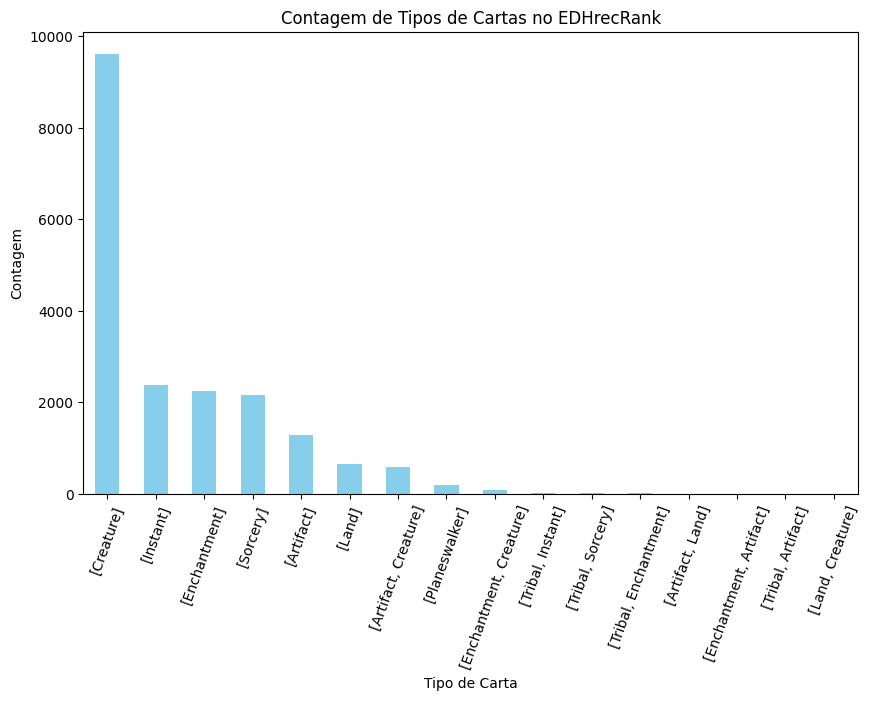

In [38]:
#Para finalizar vamos visualizar os tipos de cards mais usados, através de um gráfico de barras.
type_counts = df_sorted['types'].value_counts()

plt.figure(figsize=(10, 6))  
type_counts.plot(kind='bar', color='skyblue')
plt.title('Contagem de Tipos de Cartas no EDHrecRank')
plt.xlabel('Tipo de Carta')
plt.ylabel('Contagem')
plt.xticks(rotation=70)  

plt.show()